## Credit Card Fraud Detection

### Goal:
Try to detect whether credit card transaction is fraudalent or not based on certain predictors.


### Attribute Information:

distance_from_home - the distance from home where the transaction happened.

distance_from_last_transaction - the distance from last transaction happened.

ratio_to_median_purchase_price - Ratio of purchased price transaction to median purchase price.

repeat_retailer - Is the transaction happened from same retailer.

used_chip - Is the transaction through chip (credit card).

used_pin_number - Is the transaction happened by using PIN number.

online_order - Is the transaction an online order.

fraud - Is the transaction fraudulent. (1 represents a fraudulent transaction)

In [1]:
# import essential libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# load the data
card_url = "https://drive.google.com/file/d/1XdIqSj2n4fZ_B2lLyWNtBisDLDScxSd8/view?usp=drive_link"
card_path = "https://drive.google.com/uc?id=" + card_url.split("/")[-2]
card = pd.read_csv(card_path)
# create a copy of data frame to keep original
real_card = card.copy()
card.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [4]:
# data dimensions
card.shape

(1000000, 8)

This data frame consists of 1000000 observations and 8 columns.

In [5]:
# column names
card.columns

Index(['distance_from_home', 'distance_from_last_transaction',
       'ratio_to_median_purchase_price', 'repeat_retailer', 'used_chip',
       'used_pin_number', 'online_order', 'fraud'],
      dtype='object')

In [6]:
# column information
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


In [8]:
card.describe().T

,count,mean,std,min,25%,50%,75%,max
distance_from_home,1000000.0,26.628792,65.390784,0.004874,3.878008,9.967760,25.743985,10632.723672
distance_from_last_transaction,1000000.0,5.036519,25.843093,0.000118,0.296671,0.998650,3.355748,11851.104565
ratio_to_median_purchase_price,1000000.0,1.824182,2.799589,0.004399,0.475673,0.997717,2.096370,267.802942
repeat_retailer,1000000.0,0.881536,0.323157,0.000000,1.000000,1.000000,1.000000,1.000000
used_chip,1000000.0,0.350399,0.477095,0.000000,0.000000,0.000000,1.000000,1.000000
used_pin_number,1000000.0,0.100608,0.300809,0.000000,0.000000,0.000000,0.000000,1.000000
online_order,1000000.0,0.650552,0.476796,0.000000,0.000000,1.000000,1.000000,1.000000
fraud,1000000.0,0.087403,0.282425,0.000000,0.000000,0.000000,0.000000,1.000000


In [9]:
# check for missing values
card.isna().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

We have no missing values.

## Visualizations

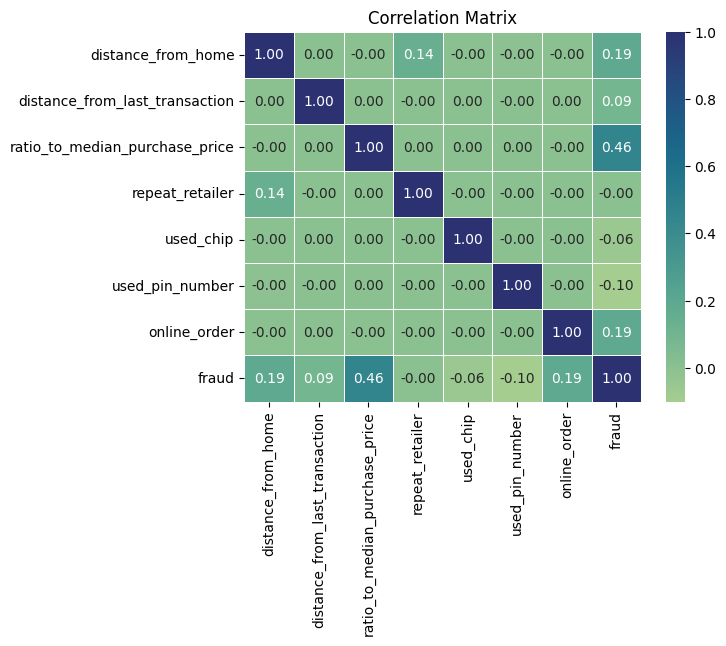

In [10]:
# check for correlation between variables
cor = card.corr()
sns.heatmap(cor, annot = True, fmt = '.2f', cmap = 'crest', linewidth = 0.7)
plt.title("Correlation Matrix")
plt.show()

Looking at the correlation heatap above, we can see we have a strong correlation between our target variable fraud and the ratio to median purchase median price feature. Therefore, we must have ratio to median purchase price as a predictor for our models. 

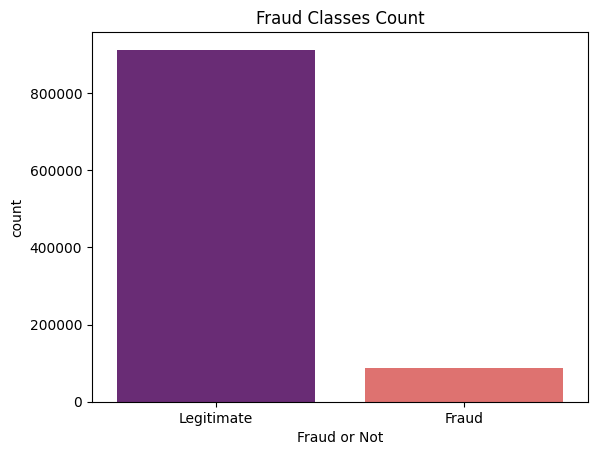

In [11]:
# check the distribution of class on our target variable
card['fraud'].value_counts()
sns.countplot(x = 'fraud', data = card, palette = 'magma')
plt.title("Fraud Classes Count")
plt.xticks(ticks = [0,1], labels = ['Legitimate','Fraud'])
plt.xlabel('Fraud or Not')
plt.show()

We can clearly see the distribution between the number of fraudlent purchases and non-fraudlent purchase where there is a significant amount of non-fraudulent purchases in our data.

online_order     0.0     1.0
fraud                       
0.0           344756  567841
1.0             4692   82711


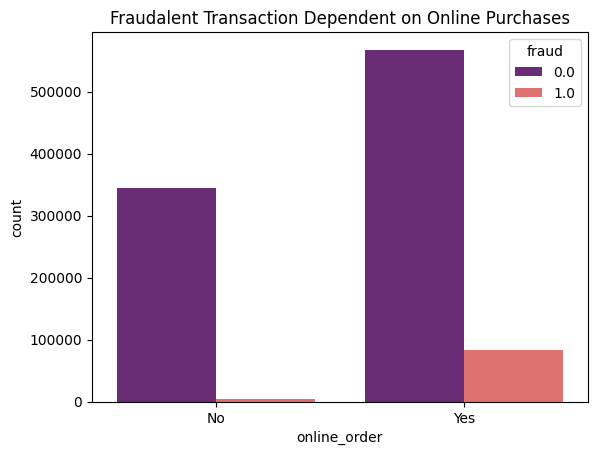

In [17]:
# check if for fraud occurrences in online purchases
sns.countplot(x = 'online_order',hue = 'fraud', data = card, palette = 'magma')
print(pd.crosstab(index = card['fraud'], columns = card['online_order']))
plt.title("fraudulent Transaction Dependent on Online Purchases")
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

As we can see there was definitely more fraud purchases done online compared to purchases not done online.

used_pin_number     0.0     1.0
fraud                          
0.0              812262  100335
1.0               87130     273


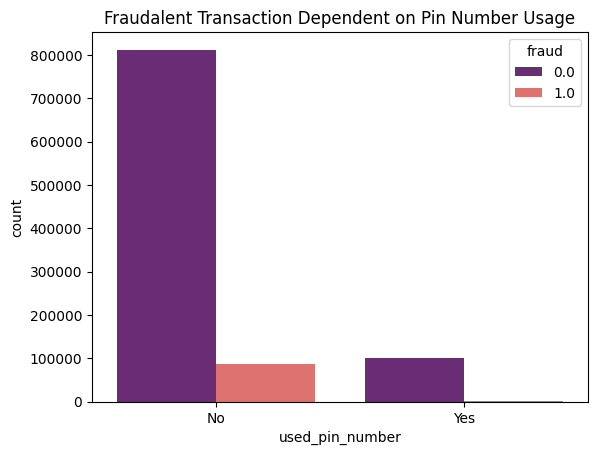

In [14]:
# check if for fraud occurrences if the card pin was used
sns.countplot(x = 'used_pin_number',hue = 'fraud', data = card, palette = 'magma')
print(pd.crosstab(index = card['fraud'], columns = card['used_pin_number']))
plt.title("fraudulent Transaction Dependent on Pin Number Usage")
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

Now comparing fraudulent purchase where the card pin was used we can see a majority of fraudulent purchases occured without using the card pin.

used_chip     0.0     1.0
fraud                    
0.0        584608  327989
1.0         64993   22410


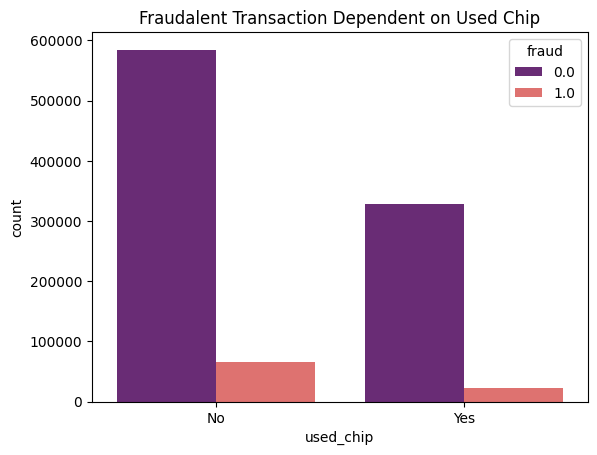

In [15]:
# check if for fraud occurrences if the card chip was used
sns.countplot(x = 'used_chip',hue = 'fraud', data = card, palette = 'magma')
plt.title("fraudulent Transaction Dependent on Used Chip")
print(pd.crosstab(index = card['fraud'], columns = card['used_chip']))
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

There was more fraudulent purchases where the chip on the card was not used. 

repeat_retailer     0.0     1.0
fraud                          
0.0              107986  804611
1.0               10478   76925


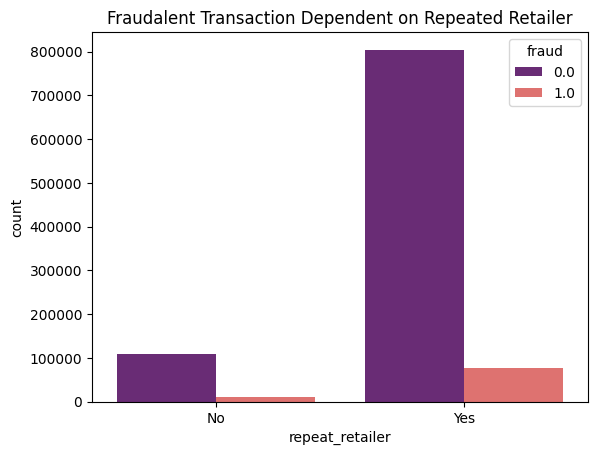

In [16]:
# check if for fraud occurrences if it was in a repeated retailer
sns.countplot(x = 'repeat_retailer',hue = 'fraud', data = card, palette = 'magma')
print(pd.crosstab(index = card['fraud'], columns = card['repeat_retailer']))
plt.title("fraudulent Transaction Dependent on Repeated Retailer")
plt.xticks(ticks = [0,1], labels = ['No','Yes'])
plt.show()

This one was interesting to me since more fraudulent purchases occured where the card was used to purchase an item previously. The probability of a fraudulent purchase in a repeated retailer was greater than a purchase on a unknown location. I don't see this as a coincidence or perhaps the retailer is a common place where fraudster go and buy items. 

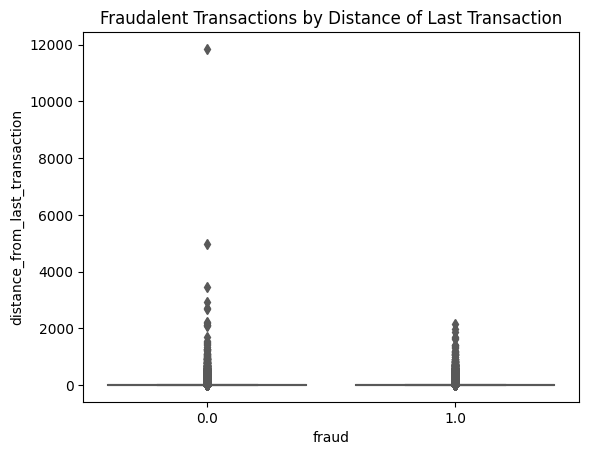

In [21]:
sns.boxplot(x = 'fraud', y = 'distance_from_last_transaction', 
                data = card, palette = 'Set2')
plt.title("fraudulent Transactions by Distance of Last Transaction")
plt.show()

This one was also interesting to me, where fraudulent purchases occured relatively close to the lastest transaction on the same card. 

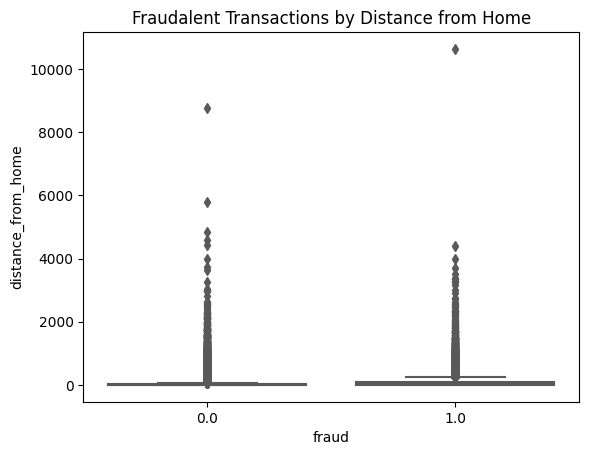

In [22]:
sns.boxplot(x = 'fraud', y = 'distance_from_home', 
                data = card, palette = 'Set2')
plt.title("fraudulent Transactions by Distance from Home")
plt.show()

## Splitting our data 

We have to be careful the way we split the data since we observed there were a huge difference between legitimate purchases and fraudulent purchases, where they were way more legitimate purchases done in our dataset. We want to split the data so that when we train the model so that it has a good amount of samples to learn fraudulent purchases but also enough samples to test our model to check whether a observation was fraudulent or not. We consider stratified sampling where instead of pulling a subset of the data we pull a shuffled sampling from the data. Note: This does not solve the problem of class imbalance in our dataset, however, it provides a better method of splitting the data. 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
# covert to integer data type since they are categorical variables
card[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']] = card[['repeat_retailer','used_chip','used_pin_number','online_order','fraud']].astype('int')

In [25]:
# scale our data before we split
scaler = StandardScaler()
card[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']] = scaler.fit_transform(card[['distance_from_home','distance_from_last_transaction','ratio_to_median_purchase_price']])

In [26]:
# check the scaled data
card.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1.000000e+06,1.000000e+06,1.000000e+06,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2.274163e-16,6.134027e-17,-2.633751e-16,0.881536,0.350399,0.100608,0.650552,0.087403
std,1.000001e+00,1.000001e+00,1.000001e+00,0.323157,0.477095,0.300809,0.476796,0.282425
min,-4.071511e-01,-1.948839e-01,-6.500182e-01,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-3.479205e-01,-1.834088e-01,-4.816812e-01,1.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.547919e-01,-1.562457e-01,-2.952096e-01,1.000000,0.000000,0.000000,1.000000,0.000000
75%,-1.353107e-02,-6.503759e-02,9.722443e-02,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.621956e+02,4.583845e+02,9.500641e+01,1.000000,1.000000,1.000000,1.000000,1.000000


In [27]:
card.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  int32  
 4   used_chip                       1000000 non-null  int32  
 5   used_pin_number                 1000000 non-null  int32  
 6   online_order                    1000000 non-null  int32  
 7   fraud                           1000000 non-null  int32  
dtypes: float64(3), int32(5)
memory usage: 42.0 MB


## Split the Data

In [28]:
# split the data

# our predictor variables
X = card.drop(['fraud'], axis = 1)

# our target variable
y = card['fraud']  

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold

In [30]:
# splitting our data into training and testing sets
# we startify our target variable 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 42, stratify = y)

In [31]:
# training sets shape
X_train.shape, y_train.shape

((700000, 7), (700000,))

In [32]:
# testing sets shape
X_test.shape, y_test.shape

((300000, 7), (300000,))

In [33]:
X_train

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
661471,-0.333739,-0.141510,-0.209753,1,0,0,0
75275,0.006473,-0.126550,-0.503107,1,0,0,0
386916,-0.294661,-0.188516,-0.300343,1,0,0,1
854266,7.786001,0.391370,0.141604,1,1,1,1
2376,-0.359986,-0.192365,-0.280407,1,0,1,1
...,...,...,...,...,...,...,...
806884,-0.312776,0.159408,-0.503563,1,0,0,0
62473,-0.130999,-0.151172,-0.280309,1,1,0,0
661343,-0.142145,-0.191992,1.840722,1,1,0,1
467315,-0.337959,1.582086,0.002524,1,1,0,1


In [34]:
y_train.value_counts()

0    638818
1     61182
Name: fraud, dtype: int64

In [35]:
y_test.value_counts()

0    273779
1     26221
Name: fraud, dtype: int64

## Random Forest Classifier

In [36]:
from sklearn.ensemble import RandomForestClassifier

In [37]:
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(X_train, y_train)

skf = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)
tr_sc = cross_val_score(rfc, X_train, y_train, cv = skf)
te_sc = cross_val_score(rfc, X_test, y_test, cv = skf)

print('Random Forest Classifier scores:')
print(f'Mean accuracy score of 5-fold CV on Training set: {tr_sc.mean()} (std: {tr_sc.std()})')
print(f'Mean accuracy score of 5-fold CV on Testing set: {te_sc.mean()} (std: {te_sc.std()})')

Random Forest Classifier scores:
Mean accuracy score of 5-fold CV on Training set: 0.9999857142857141 (std: 7.824607964335488e-06)
Mean accuracy score of 5-fold CV on Testing set: 0.9999733333333334 (std: 2.260776661041507e-05)


In [39]:
# create a feature importance data frame
dict1 = {'columns': rfc.feature_names_in_, 'importance': rfc.feature_importances_}
forest_importances = pd.DataFrame(dict1).sort_values('importance', ascending = False)
forest_importances

,columns,importance
2,ratio_to_median_purchase_price,0.508309
6,online_order,0.177745
0,distance_from_home,0.138884
5,used_pin_number,0.065165
4,used_chip,0.058726
1,distance_from_last_transaction,0.044001
3,repeat_retailer,0.007170


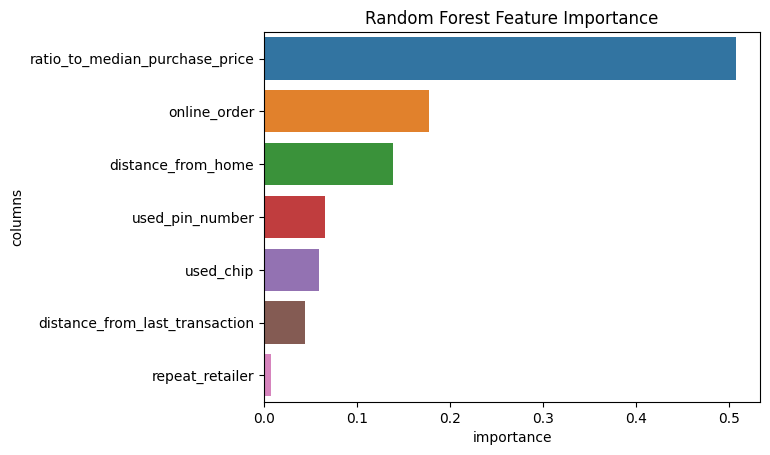

In [40]:
# plotting a horizontal bar chart on feature importance 
sns.barplot(data = forest_importances, y = 'columns', x = 'importance')
plt.title("Random Forest Feature Importance")
plt.show()

## XGBoost Classifier

In [42]:
import xgboost as xgb 

In [43]:
boost = xgb.XGBClassifier(random_state = 5)
boost.fit(X_train,y_train)

skf = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)
tr_sc = cross_val_score(boost, X_train, y_train, cv = skf)
te_sc = cross_val_score(boost, X_test, y_test, cv = skf)


print('XGBoost Classifier scores:')
print(f'Mean accuracy score of 5-fold CV on Training set: {tr_sc.mean()} (std: {tr_sc.std()})')
print(f'Mean accuracy score of 5-fold CV on Testing set: {te_sc.mean()} (std: {te_sc.std()})')

XGBoost Classifier scores:
Mean accuracy score of 5-fold CV on Training set: 0.9999757142857142 (std: 1.069044967647206e-05)
Mean accuracy score of 5-fold CV on Testing set: 0.9999566666666666 (std: 3.091206165164894e-05)


In [44]:
# create a feature importance data frame
dict1 = {'columns': boost.feature_names_in_, 'importance': boost.feature_importances_}
boost_importances = pd.DataFrame(dict1).sort_values('importance', ascending = False)
boost_importances

,columns,importance
2,ratio_to_median_purchase_price,0.536974
6,online_order,0.260885
5,used_pin_number,0.069966
4,used_chip,0.055687
0,distance_from_home,0.054601
1,distance_from_last_transaction,0.021888
3,repeat_retailer,0.000000


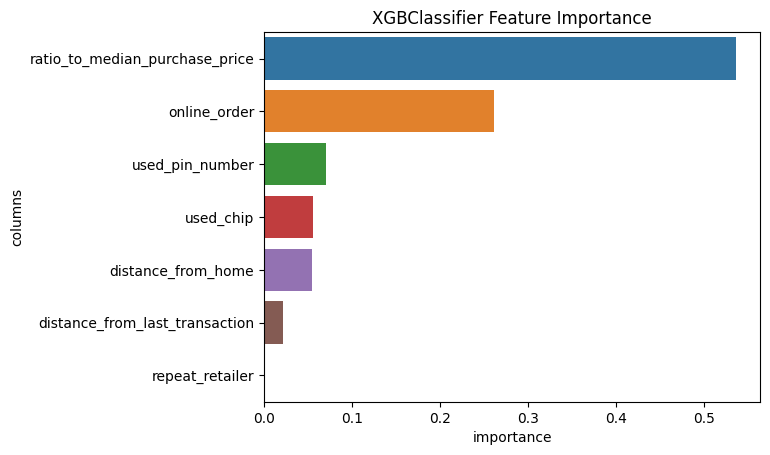

In [45]:
# plotting a horizontal bar chart on feature importance 
sns.barplot(data = boost_importances, y = 'columns', x = 'importance')
plt.title("XGBClassifier Feature Importance")
plt.show()

## Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression

In [47]:
# Logistic Regression with Lasso penalty (L1)
log_l1 = LogisticRegression(solver = 'liblinear',penalty = 'l1')
log_l1.fit(X_train,y_train)

skf = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)
tr_sc = cross_val_score(log_l1, X_train, y_train, cv = skf)
te_sc = cross_val_score(log_l1, X_test, y_test, cv = skf)


print('Logistic Regression with L1 penalty, scores:')
print(f'Mean accuracy score of 5-fold CV on Training set: {tr_sc.mean()} (std: {tr_sc.std()})')
print(f'Mean accuracy score of 5-fold CV on Testing set: {te_sc.mean()} (std: {te_sc.std()})')

Logistic Regression with L1 penalty, scores:
Mean accuracy score of 5-fold CV on Training set: 0.9584685714285716 (std: 0.0002270305202893599)
Mean accuracy score of 5-fold CV on Testing set: 0.9596033333333333 (std: 0.00041384377084433937)


In [48]:
# Logistic Regression With Ridge penalty (L2)
log_l2 = LogisticRegression(solver = 'liblinear',penalty = 'l2')
log_l2.fit(X_train,y_train)

skf = StratifiedKFold(shuffle = True, n_splits = 5, random_state = 5)
tr_sc = cross_val_score(log_l2, X_train, y_train, cv = skf)
te_sc = cross_val_score(log_l2, X_test, y_test, cv = skf)


print('Logistic Regression with L2 penalty, scores:')
print(f'Mean accuracy score of 5-fold CV on Training set: {tr_sc.mean()} (std: {tr_sc.std()})')
print(f'Mean accuracy score of 5-fold CV on Testing set: {te_sc.mean()} (std: {te_sc.std()})')

Logistic Regression with L2 penalty, scores:
Mean accuracy score of 5-fold CV on Training set: 0.9583314285714286 (std: 0.00023628070473182504)
Mean accuracy score of 5-fold CV on Testing set: 0.9592933333333333 (std: 0.00040669398815325417)


In [49]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

The accuracy of Logistic(L1) model on testing set is: 95.91733333333333% 



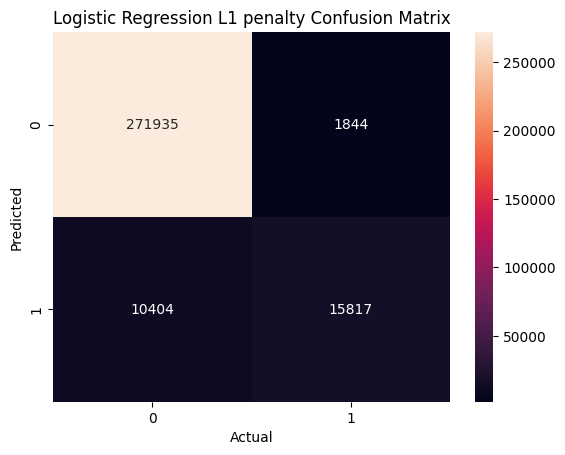

In [50]:
y_pred = log_l1.predict(X_test)

# Confusion Matrix
log_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(log_matrix, annot=True, fmt="d")
plt.title('Logistic Regression L1 penalty Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')

print(f"The accuracy of Logistic(L1) model on testing set is: {accuracy_score(y_test, y_pred)*100}% \n")

Creating a confusion matrix on the testing set and using sklearn [confusion matrix documentation](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html) the upper left corner represents the true negatives. In our scenario the true negatives represents all non-fraudulent purchase predicted accurately by the Logistic Regression model. The lower right corner are the true positives or the fraudulent purchases predicted accurately by our model. However in the top right corner we have the false positives, which represents all the observations categorized as fraudulent purchases but actually weren't fraudulent purchases. The number of false positives in our model was about 1841 purchases that were considered fraudulent transactions but actually were not. Now this represents a problem since we are denying a good amount of purchases, since they were considered fraudulent but weren't, this mistake might cost a company a huge amount of money. So we want to reduce the amount of false positives and categorized them as verified purchases. Note we might classify actual fraudulent purchases as non-fraudulent purchases but this scenario would cost the company less expense rather than considering worst case scenario as a fraudulent purchase. 

In [51]:
log_l1.predict_proba(X_test)

array([[9.37989109e-01, 6.20108906e-02],
       [9.99988681e-01, 1.13194586e-05],
       [9.99739119e-01, 2.60881122e-04],
       ...,
       [9.99964058e-01, 3.59423381e-05],
       [9.88928749e-01, 1.10712505e-02],
       [1.95849024e-01, 8.04150976e-01]])

The accuracy of Logistic(L1) model on testing set is: 94.428% 



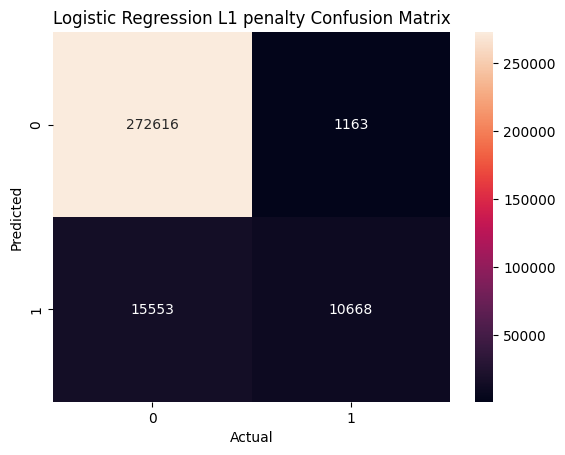

In [52]:
THRESHOLD = .75
y_pred = np.where(log_l1.predict_proba(X_test)[:,1] > THRESHOLD, 1, 0)

# Confusion Matrix
log_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(log_matrix, annot=True, fmt="d")
plt.title('Logistic Regression L1 penalty Confusion Matrix')
plt.xlabel('Actual')
plt.ylabel('Predicted')

print(f"The accuracy of Logistic(L1) model on testing set is: {accuracy_score(y_test, y_pred)*100}% \n")


Observe how increasing the threshold for a fraudulent purchase probability to be greater than 75%, we were able to reduce the number of false positives by 700. However, this came at a cost of reducing the number of true positive, the number of predicting a fraudulent purchase. We also increased the number of false negatives, the fraudulent purchases classified as non-fraudulent purchases. 

# Credit Card Fraud Predictor System 

In [53]:
# we choose a random observation
X_test.index

Int64Index([217309, 902387, 175152, 527113, 973041, 234517, 170610, 810487,
            775308, 229341,
            ...
            972726, 758700, 692687, 962441, 719037, 201404, 491022, 184583,
            281543,  49262],
           dtype='int64', length=300000)

In [54]:
# check if the example is a fraudulent purchase or not
fraud_purchase = card.iloc[card.index == 170283,:]
print(fraud_purchase.shape)
fraud_purchase

(1, 8)


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
170283,-0.325472,2.296325,-0.435238,1,0,0,1,1


Observe that the observation purchased is a fraudulent purchase! Lets see if our credit card fraud detector system is able to recognize that this purchase is fraudulent. 

In [55]:
# we drop the fraud column
example = fraud_purchase.drop(['fraud'], axis = 1)

In [56]:
example

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order
170283,-0.325472,2.296325,-0.435238,1,0,0,1


In [57]:
# credit card fraud detection system
def fraud_detection(obs):
    result = boost.predict(obs)
    if result[0] == 1:
        print("This is a fraudulent purchase!")
    else: 
        print("This transaction is verified")

In [58]:
# check the results 
fraud_detection(example)

This is a fraudalent purchase!


## Conclusion: 
The XGBoost Classifier algorithm returned an accuracy score on both the training and testing data of above 99.99%. The accuracy score recieved was the mean of a 5-fold stratified cross validation on both data sets. Therefore, we can conclude that the model was not overfitting or being biased by the data it was trained on. This makes the credit card fraud detection system a pretty accurate detector for fraudalent transactions. 